<a href="https://colab.research.google.com/github/ycyoondev/ML-study/blob/master/211130_Pandas-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

Group by

split -> apply -> combine 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/jennybc/gapminder/master/inst/extdata/gapminder.tsv', sep='\t')
df # 연습용 DF

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [4]:
h_index = df.groupby("continent")["lifeExp"].mean()

In [7]:
h_index.reset_index() # 새롭게 만듬

,continent,lifeExp
0,Africa,48.865330
1,Americas,64.658737
2,Asia,60.064903
3,Europe,71.903686
4,Oceania,74.326208


In [8]:
h_index

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [12]:
grouped = df.groupby("continent")
grouped

In [13]:
grouped.get_group("Asia")

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


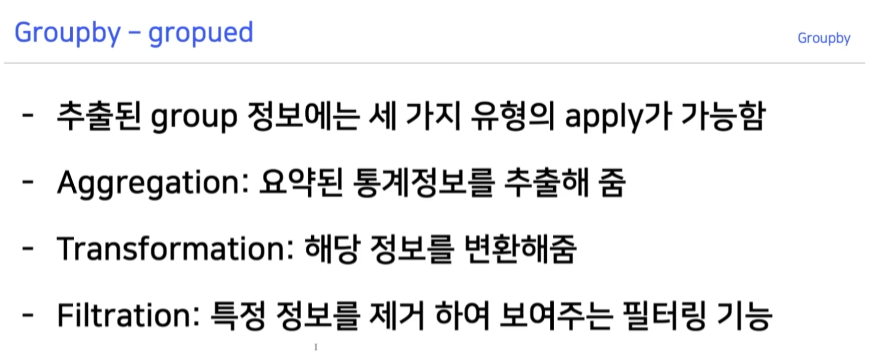

In [14]:
# grouped된 상태에서 그룹별로 합
grouped.agg(sum)

,year,lifeExp,pop,gdpPercap
continent,,,,
Africa,1235208,30491.96600,6187585961,1.368903e+06
Americas,593850,19397.62100,7351438499,2.140833e+06
Asia,783882,23785.70168,30507333901,3.129252e+06
Europe,712620,25885.32700,6181115304,5.209011e+06
Oceania,47508,1783.82900,212992136,4.469186e+05


In [16]:
# grouped된 상태에서 그룹별로 평균
grouped.agg(np.mean) # 그냥 mean은 안됨

,year,lifeExp,pop,gdpPercap
continent,,,,
Africa,1979.5,48.865330,9.916003e+06,2193.754578
Americas,1979.5,64.658737,2.450479e+07,7136.110356
Asia,1979.5,60.064903,7.703872e+07,7902.150428
Europe,1979.5,71.903686,1.716976e+07,14469.475533
Oceania,1979.5,74.326208,8.874672e+06,18621.609223


In [17]:
grouped["lifeExp"].agg([np.sum, np.mean, np.std])

,sum,mean,std
continent,,,
Africa,30491.96600,48.865330,9.150210
Americas,19397.62100,64.658737,9.345088
Asia,23785.70168,60.064903,11.864532
Europe,25885.32700,71.903686,5.433178
Oceania,1783.82900,74.326208,3.795611


Case study

In [19]:
df=pd.read_csv('https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv', sep=',')
df # 연습용 DF

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [20]:
# 날자 데이터를 날자로 만들어준다. (그냥은 string으로 되어있음)
import dateutil 

df["date"] = df["date"].apply(dateutil.parser.parse, dayfirst=True) # 문자를 날짜로 바꾸고, 적용하겠다.
df.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [21]:
df

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [22]:
import matplotlib as plt

df.groupby("month")["duration"].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

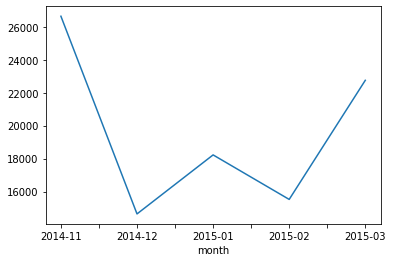

In [23]:
df.groupby("month")["duration"].sum().plot()

In [24]:
df[df["item"] == "call"]

,index,date,duration,item,month,network,network_type
1,1,2014-10-15 06:58:00,13.0,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.0,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.0,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.0,call,2014-11,Tesco,mobile
5,5,2014-10-15 18:55:00,4.0,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
807,807,2015-03-03 10:12:00,745.0,call,2015-03,Vodafone,mobile
808,808,2015-03-03 10:27:00,57.0,call,2015-03,Vodafone,mobile
809,809,2015-03-03 14:34:00,1325.0,call,2015-03,Vodafone,mobile
810,810,2015-03-03 18:36:00,768.0,call,2015-03,Three,mobile


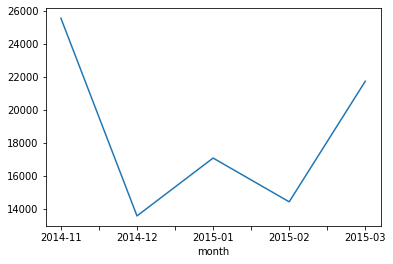

In [25]:
df[df["item"] == "call"].groupby("month")["duration"].sum().plot()

Pivot Table

In [26]:
df.pivot_table(["duration"], # value
               index=[df.month, df.item], # row에 해당하는 index 넣어준다. 여러개 넣으면 리스트로 넣는다.
               columns=df.network, # columns에 해당
               aggfunc="sum", # 계산 방식
               fill_value=0 # 연산안되는 NaN일때 0으로 취급해라
               )

duration                        ...                                 
network        Meteor Tesco  Three Vodafone  ... landline special voicemail world
month   item                                 ...                                 
2014-11 call     1521  4045  12458     4316  ...     2906       0       301     0
        data        0     0      0        0  ...        0       0         0     0
        sms        10     3     25       55  ...        0       1         0     0
2014-12 call     2010  1819   6316     1302  ...     1424       0       690     0
        data        0     0      0        0  ...        0       0         0     0
        sms        12     1     13       18  ...        0       0         0     4
2015-01 call     2207  2904   6445     3626  ...     1603       0       285     0
        data        0     0      0        0  ...        0       0         0     0
        sms        10     3     33       40  ...        0       0         0     0
2015-02 call     1188  4087   6279     1864  ...      730       0       268     0
        data        0     0      0        0  ...        0       0         0     0
        sms         1     2     11       23  ...        0       2         0     0
2015-03 call      274   973   4966     3513  ...    11770       0       231     0
        data        0     0      0        0  ...        0       0         0     0
        sms         0     4      5       13  ...        0       0         0     3

[15 rows x 9 columns]

merge

- merge: 데이터를 합칠때 외래키를 통해서 합치는 방식 inner join과 유사


In [30]:
# merge
df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                   'b':['b0','b1','b2','b3'],
                   'c':['c0','c1','c2','c3']},
                  index = [0,1,2,3])

df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                   'b':['b2','b3','b4','b5'],
                   'c':['c2','c3','c4','c5'],
                   'd':['d2','d3','d4','d5']},
                   index = [2,3,4,5])

print(df1, '\n')
print(df2)

    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3 

    a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5


In [32]:
pd.merge(df1, df2, on="a") # inner join

,a,b_x,c_x,b_y,c_y,d
0,a2,b2,c2,b2,c2,d2
1,a3,b3,c3,b3,c3,d3


In [33]:
pd.merge(df1, df2, on="a", how="left") # 왼쪽은 다 나오고, 오른쪽항목이 없으면 NaN 

,a,b_x,c_x,b_y,c_y,d
0,a0,b0,c0,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN
2,a2,b2,c2,b2,c2,d2
3,a3,b3,c3,b3,c3,d3


In [34]:
pd.merge(df1, df2, on="a", how="outer") # outer join

,a,b_x,c_x,b_y,c_y,d
0,a0,b0,c0,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN
2,a2,b2,c2,b2,c2,d2
3,a3,b3,c3,b3,c3,d3
4,a4,NaN,NaN,b4,c4,d4
5,a5,NaN,NaN,b5,c5,d5


In [37]:
pd.merge(df1, df2, left_index=True, right_index=True) # inner join

,a_x,b_x,c_x,a_y,b_y,c_y,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
